# Naïve Bayes Classifier

## Part A: Model Code

Design a Multinomial Naïve Bayes classifier for performing binary classification on the SMS Spam collection dataset. Implement the following methods for the Multinomial_NB model class. The model uses one hyperparameter “alpha” which represents the Additive or Laplace smoothing parameter (0 for no smoothing).



1 . ImplementaMultinomial_NB model class. It should have the following methods.

    a. __init__(self, alpha=1.0)
    Initialization function to instantiate the class.
    
    b. fit(self, X, Y)
    Arguments:
    X : ndarray
    A numpy array with rows representing data samples and columns representing numerical features.
    Y : ndarray
    A 1D numpy array with labels corresponding to each row of the feature matrix X.
    Returns:
    No return value necessary.
    
    c.
    predict(self, X)
    This method performs classification on an array of test vectors X. Use log probabilities to avoid overflow.
    Arguments:
    X : ndarray
    A numpy array containing samples to be used for prediction. Its rows represent data samples and columns represent numerical features. 
    Returns:
    1D array of predictions for each row in X.
    The 1D array should be designed as a column vector.
    
    d. [Extra Credit for 478 and Mandatory for 878] [5 pts]
    predict_proba(self, X)
    This method returns probability estimates for the test matrix X.
    Arguments:
    X : ndarray
    A numpy array containing samples to be used for prediction. Its rows represent data samples and columns represent numerical features.
    
    Returns:
    A numpy array that contains probability of the samples (unnormalized posterior) for each class in the model. The number rows is equal to the rows in X and number of columns is equal to the number of classes.
    
    e. [Extra Credit for 478 and Mandatory for 878] [5 pts]
    predict_log_proba(self, X)
    This method returns log-probability estimates for the test matrix X.
    Arguments:
    X : ndarray
    A numpy array containing samples to be used for prediction. Its rows represent data samples and columns represent numerical features.
    Returns:
    A numpy array that contains log-probability of the samples (unnormalized log posteriors) for each class in the model. The number rows is equal to the rows in X and number of columns is equal to the number of classes.

In [1]:
class Multinomial_NB:
    
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        return 
    
    def fit(self, X, Y):
        #Counting all occurence of class c in sample 
        all_class = np.unique(Y)
        self.class_prior = [0 for i in all_class]
        #print(self.class_prior)
        for i in Y:
            for j in range(len(all_class)):
                if (i == all_class[j]):
                    self.class_prior[j] = self.class_prior[j] + 1
        #compute class prior            
        for i in range(len(self.class_prior)):
            self.class_prior[i] = (self.class_prior[i] + self.alpha) / len(Y)
        #print(self.class_prior)
        
        
        #self.class_probability = [[0 for j in X[0]] for i in all_class]
        
        self.class_probability = []
        for i in range(len(all_class)):
            class_feature = []
            #print(X)
            for j in range(len(X[0])):
                class_feature.append(0.01)
            self.class_probability.append(class_feature.copy())
        #self.class_probability [1][10] = 12002002
        #print(self.class_probability)

        
        #counting words in each class 
        for i in range(len(Y)):
            #print(all_class[0])
            #print(Y[i])
            if Y[i] == all_class[0]:
                print(Y[i])
                for j in range(len(X[i])):
                    #print(X[i].toarray())
                    if (X[i][j]-1) < 0.001:
                        print("Has feature for ", Y[i])
                        self.class_probability[0][j] = self.class_probability[0][j] + 1
            elif Y[i] == all_class[1]:
                print(Y[i])
                for j in range(len(X[i])):
                    #print(X[i].toarray())  
                    if (X[i][j]-1) < 0.001:
                        print("Has feature for ", Y[i])
                        #print("Count", Y[i])
                        self.class_probability[1][j] = self.class_probability[1][j] + 1

        sum_all_probability = [self.class_probability[0][j] + self.class_probability[1][j] for j in range(len(self.class_probability[1]))]
        print(sum_all_probability)
        for i in range(len(self.class_probability)):
            for j in range(len(self.class_probability[0])):
                self.class_probability[i][j] = self.class_probability[i][j]/sum_all_probability[j]
                print(self.class_probability[i][j])
        
        return self.class_probability
    
    def predict(self, X):
        label_predict = []
        for i in range(len(X)):
            prediction_0 = self.class_prior[0]
            prediction_1 = self.class_prior[1]
            prediction = 0
            for j in range(len(X[i])):
                prediction_0 = prediction_0 + X[i][j] * self.class_probability[0][j]
                prediction_1 = prediction_1 + X[i][j] * self.class_probability[1][j]
            if (prediction_0 > prediction_1):
                prediction = 0
            else:
                prediction = 1
            label_predict.append(prediction)
            
        #np.array(label_predict).shape = (len(label_predict),1)
            
        
        return label_predict

    
    def predict_proba(self, X):
        label_predict = []
        for i in range(len(X)):
            prediction_0 = self.class_prior[0]
            prediction_1 = self.class_prior[1]
            prediction = 0
            for j in range(len(X[i])):
                prediction_0 = prediction_0 + X[i][j] * self.class_probability[j]
                prediction_1 = prediction_1 + X[i][j] * self.class_probability[j]
            if (prediction_0 > prediction_1):
                label_prediction.append(0)
            else:
                label_prediction.append(1)
        return label_predict
    
    def predict_log_proba(self, X):
        label_predict = []
        for i in range(len(X)):
            prediction_0 = self.class_prior[0]
            prediction_1 = self.class_prior[1]
            prediction = 0
            for j in range(len(X[i])):
                prediction_0 = prediction_0 + X[i][j] * np.log(self.class_probability[0][j])
                prediction_1 = prediction_1 + X[i][j] * np.log(self.class_probability[1][j])
            if (prediction_0 > prediction_1):
                label_prediction.append(prediction_0)
            else:
                label_prediction.append(prediction_1)
        return label_predict 

        




## PART B: Exploratory Data Analysis 

2. Read in the “SMSSpamCollection.csv” as a pandas data frame.

In [2]:
import pandas as pd
df = pd.read_csv('SMSSpamCollection.csv', delimiter=",", header=None)
df.describe()

,0,1
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


3. Use the techniques from the first recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. [3 pts]

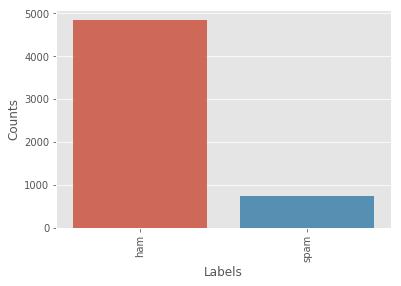

In [20]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

label_counts = df[0].value_counts()

sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

4. Generate a bar plot to display the class distribution. You may use “seaborn”s barplot function. [2 pts]

## PART C: Feature Extraction

5. Normalize the “text” by performing stemming and lemmatization. You should do experimentation with both stemming and lemmatization and see whether stemming/lemmatization or a combination of both improves the accuracy of classification. Finally use the best performing normalization. For text normalization you may use the NLTK library.

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vdoan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

6. Generate word clouds for both the spam and ham emails. You may use the NLTK library. [2 pts]

In [4]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud


lemmatizer = WordNetLemmatizer()



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vdoan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df['text_lemmatized'] = df[1].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text.lower())))

In [6]:
X_lemmatized = df['text_lemmatized']

6. Generate word clouds for both the spam and ham emails. You may use the NLTK library. [2 pts]

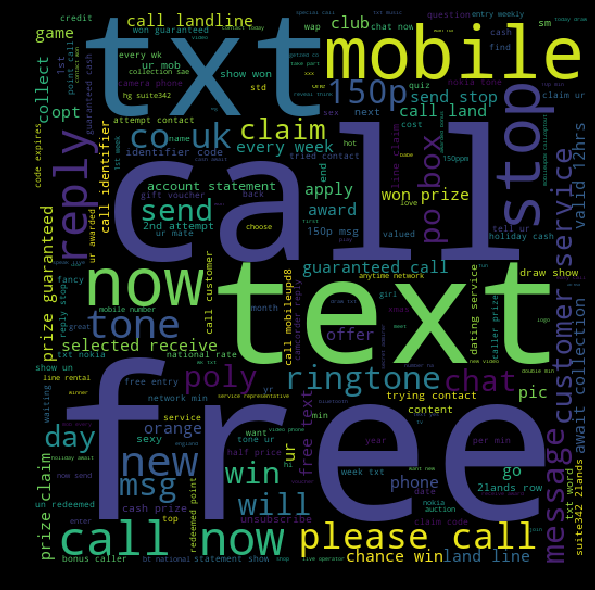

In [7]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

spam_words = ''.join(list(df[df[0]=='spam']['text_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

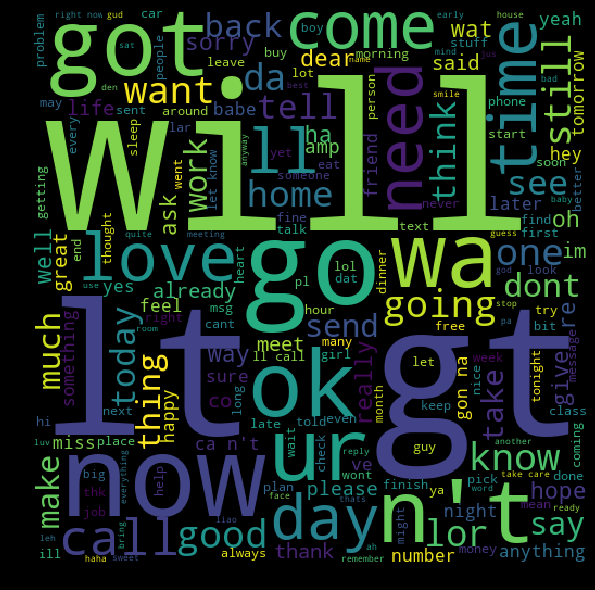

In [22]:
spam_words = ''.join(list(df[df[0]=='ham']['text_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

7. Remove the stop words from the text and convert the text content into numerical feature vectors. Note that for the multinomial Naïve Bayes classifier you need to count word occurrences as feature values. You may use Scikit-Learn’s CountVectorizer object for text preprocessing and feature vectorization. [3 pts]

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [8]:
from nltk.corpus import stopwords 

set(stopwords.words('english'))
    
X_tokenize = []

for i in X_lemmatized:
    tokenized_string = word_tokenize(i)
    X_tokenize.append(' '.join(list([word for word in tokenized_string if word not in stopwords.words('english')])))

In [9]:
X_tokenize[0]

'go jurong point , crazy.. available bugis n great world la e buffet ... cine got amore wat ...'

In [10]:
df['processed data'] = X_tokenize

In [11]:
df.head()

,0,1,text_lemmatized,processed data
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point , crazy.. available only...","go jurong point , crazy.. available bugis n gr..."
1,ham,Ok lar... Joking wif u oni...,ok lar ... joking wif u oni ...,ok lar ... joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor ... u c already then sa...,u dun say early hor ... u c already say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i do n't think he go to usf , he life arou...","nah n't think go usf , life around though"


In [13]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB


#count_vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 2))
#count_vect = CountVectorizer(lowercase=True, stop_words='english')
#count_vect = CountVectorizer(lowercase=True, stop_words='english', binary=True)
count_vect = CountVectorizer()


X_counts = count_vect.fit_transform(X_tokenize)
print(X_counts.shape)

print("Type of the occurance count matrix (should be sparse): ")
print(type(X_counts))

tfidf_vector = TfidfVectorizer()
X_tfidf = tfidf_vector.fit_transform(X_tokenize)
print(X_tfidf.shape)



(5574, 8212)
Type of the occurance count matrix (should be sparse): 
<class 'scipy.sparse.csr.csr_matrix'>
(5574, 8212)


In [14]:
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
X_tokenize[:4]

['go jurong point , crazy.. available bugis n great world la e buffet ... cine got amore wat ...',
 'ok lar ... joking wif u oni ...',
 "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question ( std txt rate ) & c 's apply 08452810075over18 's",
 'u dun say early hor ... u c already say ...']

In [16]:
X_tokenize[0]

'go jurong point , crazy.. available bugis n great world la e buffet ... cine got amore wat ...'

In [17]:
#df['tokenized'] = X_counts.toarray()
#df['tokenized_tfidf'] = X_tfidf.toarray()
X = X_counts.toarray()


In [ ]:
X[0]

In [18]:
df['features'] = X.tolist()

In [60]:
X_counts[1]

<1x8212 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [19]:
df.head()

,0,1,text_lemmatized,processed data,features
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point , crazy.. available only...","go jurong point , crazy.. available bugis n gr...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,ham,Ok lar... Joking wif u oni...,ok lar ... joking wif u oni ...,ok lar ... joking wif u oni ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor ... u c already then sa...,u dun say early hor ... u c already say ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i do n't think he go to usf , he life arou...","nah n't think go usf , life around though","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


8. Create data or feature matrix X and the target vector Y. The number of columns in X is equal to the number of features. [2 pts]

In [21]:
X = df['features']


In [22]:
y = df[0]

In [23]:
X[:3]

850     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3836    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4742    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: features, dtype: object

9. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names. [2 pts]

In [20]:
df = df.sample(frac=1)

In [25]:
X[0]

<5574x8212 sparse matrix of type '<class 'numpy.float64'>'
	with 48550 stored elements in Compressed Sparse Row format>

10. Partition the data into train and test set (80%-20%). Use the “Partition” function from your previous assignment.8. Create data or feature matrix X and the target vector Y. The number of columns in X is equal to the number of features. [2 pts]

In [24]:
import numpy as np
def partition(X, y,t):
    X_test = X[:int(t*X.shape[0])]
    y_test = y[:int(t*len(y))]
    X_train = X[int(t*X.shape[0]):]
    y_train = y[int(t*len(y)):]
    
    return X_train, y_train, X_test, y_test

#X = (X - X.min())/ (X.max() - X.min())
# X = (X - X.mean())/X.std()
# X.insert(0,'bias',0) # not sure if we need this?

X_train, y_train, X_test, y_test = partition(X, y, 0.2)

In [25]:
X_train.shape

(4460,)

In [26]:
X_train[:4]

406     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5141    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2240    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4138    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: features, dtype: object

## PART D: Model Evaluation

11. Model selection via Hyper-parameter tuning: Use the kFold function from the previous experiment to evaluate the performance of your model for the following values of the hyperparameter alpha = [0.1, 0.5, 1.0, 1.5, 2.0]. Determine the best model (model selection) based on the overall performance (lowest average error).

    For the error_function of the kFold function argument use the “F1 Score” function from previous assignment.[5 pts]

In [ ]:
#pVector = predict vector
#aVector = actual vector
def accuracy_score(y_true, y_pred):
    true_positive = 0
    for i in range(len(y_true)):
        if(y_true[i] == y_pred[i]):
            true_positive = true_positive + 1
    
    accuracy = true_positive / len(y_true)
    genError = 1 - accuracy  
            
    return accuracy, genError

In [ ]:
#Binary case
def precision_score(y_true, y_pred):
    true_positive = 0
    false_positive = 0
    
    for i in range(len(y_true)):
        if (y_pred[i] == 1):
            if (y_pred[i] == y_true[i]):
                true_positive = true_positive + 1
            else:
                false_positive = false_positive + 1
    
    if((true_positive + false_positive == 0)):
        precision = 0
    else:
        precision = true_positive / (true_positive + false_positive)
    return precision

def recall_score(y_true, y_pred):
    true_positive = 0
    false_negative = 0 
    
    for i in range(len(y_pred)):
        if (y_pred[i] == 1):
            if (y_pred[i] == y_true[i]):
                true_positive = true_positive + 1
        elif(y_pred[i] == 0):
            if (y_pred[i] != y_true[i]):
                false_negative = false_negative + 1
    if((true_positive + false_negative == 0)):
        recall = 0
    else:
        recall = true_positive / (true_positive + false_negative)
    return recall

def f1_score(y_true, y_pred):    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    if ((precision + recall) == 0):
        f1 = 0
    else:
        f1 = 2 * ((precision*recall)/(precision+recall))
    return f1

In [ ]:
def cross_val_kfold(model, X, y, folds, learning_rate, regularizer, lambd, **kwargs):
    
    partition = partitionHelper(np.array(X),folds)
    labels_partition = partitionHelper(np.array(y),folds)
    a2 = []
    epochs = 1000
    tol = 0.01
    
    prediction = []
    all_train_mse = []
    all_train_rmse = []
    all_mse = []
    
    for l in range(len(partition)-1):
        test_set = partition[l]
        test_label = labels_partition[l]
        train_set_unflattened = partition.copy()
        train_label_unflattened = labels_partition.copy()
        del train_set_unflattened[l]
        del train_label_unflattened[l]

        train_set = np.array([y for x in train_set_unflattened for y in x])
        train_label = np.array([y for x in train_label_unflattened for y in x])

        model.fit(train_set, train_label,learning_rate, 1000, tol, regularizer, lambd, **kwargs)
        
        #for k in range(len(partition[l])-1):
        #    prediction[k] = model.predict(partition[l][k])
        prediction = model.predict(test_set)
    
        error = mse(prediction, train_label)
        all_mse.append(error)
            
    return {'average_error': all_mse, 'pred': prediction, 'labels': test_label}

def kFold(model, X, Y, cv, model_args, error_function, **kwargs):

    accuracyMatrix = []

    learning_rates = model_args[0]
    regularizers =  model_args[1]
    lambdas = model_args[2]
    total_cross_val = []
    total_arguments = []
    
    all_runs = []
    
    for i in learning_rates:
        #a = []
        #cross_val_a = []
        #argument_a = []
        for j in regularizers:
            for k in lambdas:
                a2 = cross_val_kfold(model, X, Y, cv, i, j, k, **kwargs)
                total_cross_val.append(a2)
                accuracyMatrix.append(mean(a2['average_error']))
                total_arguments.append([i,j,k])
                all_runs.append([i,j,k,mean(a2['average_error']),a2['average_error']])
    
    index_i = 0
    minAccuracy = accuracyMatrix[0]
    for i in range(len(accuracyMatrix)):
        if(minAccuracy > accuracyMatrix[i]):
            minAccuracy = accuracyMatrix[i]
            index_i = i

    print("Min Error Function:", minAccuracy)
    print("Best Model Parameters")
    print("Learning rates: ", total_arguments[index_i][0])
    print("Regularizers: ", total_arguments[index_i][1])
    print("Lambda: ", total_arguments[index_i][2])
    #print("Everything else: ", total_cross_val[index_i])

    return all_runs

12. [Extra Credit for 478 and Mandatory for 878]: Generate the Receiver Operating Characteristic (ROC) curve and compute the area under curve (AUC) score. You may reuse the functions from your previous assignment. [10 pts]

In [ ]:
def roc_curve(confusionMatrix):
    #Using sklearn: y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]
    threshold = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.3, 0.2, 0.1, 0]
    true_positive = confusionMatrix[1][1]
    positive = confusionMatrix[1][0] + confusionMatrix[1][1]
    false_negative = confusionMatrix[1][0]
    negative = confusionMatrix[0][0] + confusionMatrix[1][1]
    
    true_pos_rate = true_positive / postive 
    false_pos_rate = false_positive / negative 
    
    return true_pos_rate, false_pos_rate
    
def plot_roc_curve():
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
from numpy import trapz

def roc_auc(x, y):
    area = trapz(y, x, dx=0.1)
    
    return area

13. Evaluate your model on the test data and report the following performance measures. You may reuse the functions from your previous assignment.

        a. Precision
    
        b. Recall
    
        c. F1 score
    
        d. Confusion matrix
    
        e. Accuracy
         [5 pts]

27. [Extra Credit for 478 and Mandatory for 878] Implement early stopping in the “fit” method of the Softmax_Regression model. You will have to use the following two parameters of the model: early_stopping and validation_fraction.

    Also note that when training the model using early stopping it should generate an early stopping curve. [10 pts]

28. [Extra Credit for both 478 & 878] Implement the Stochastic Gradient Descent Logistic Regression algorithm. Using cross-validation determine the best model.
    Evaluate your model on test data and report the accuracy and confusion matrix.[20 pts]